In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import openturns as ot
import matplotlib.pyplot as plt

In [3]:
from matplotlib import rc
#style.use('default')
#rc('font', **{'family': 'Times'})
#rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

In [4]:
dist1 = ot.WeibullMin(1.4, 1.4)
dist2 = ot.WeibullMin(1.4, 3.)

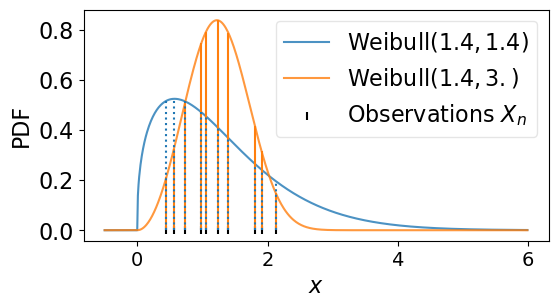

In [5]:
n = 10
xsample = dist2.getSample(n)
xplot = np.arange(-0.5, 6, 0.01).reshape(-1, 1)
pdf1 = dist1.computePDF(xplot)
pdf2 = dist2.computePDF(xplot)
plt.figure(figsize=(6, 3))
plt.plot(xplot, np.array(pdf1).flatten(), color="C0", label="Weibull($1.4, 1.4$)", alpha=0.8)
plt.plot(xplot, np.array(pdf2).flatten(), color="C1", label="Weibull($1.4, 3.$)", alpha=0.8)
plt.stem(xsample, dist2.computePDF(xsample), markerfmt="", linefmt="C1", basefmt=" ")
plt.stem(xsample, dist1.computePDF(xsample), markerfmt="", linefmt=":", basefmt=" ")
plt.scatter(xsample, [0]*n, marker="|", color='k', label="Observations $X_n$")
plt.xlabel("$x$")
plt.ylabel("PDF")
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig("figures/MLE.png", dpi=300, bbox_inches='tight', transparent=True);

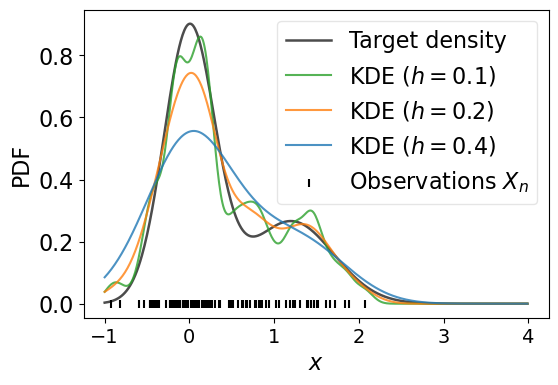

In [6]:
n = 100
dist = ot.Mixture([ot.Normal(0, 0.3), ot.Normal(1.2, 0.5)], [0.4, 0.2])
xsample = dist.getSample(n)
xplot = np.arange(-1., 4, 0.01).reshape(-1, 1)
pdf = dist.computePDF(xplot)
# KDE 

def plot_kde(h, color):
    kernel = ot.KernelSmoothing()
    kde = kernel.build(xsample, [h])
    kde_pdf = kde.computePDF(xplot)
    return plt.plot(xplot, np.array(kde_pdf).flatten(), color=color, label=f"KDE ($h={h}$)", alpha=0.8)
# PLOTS
plt.figure(figsize=(6, 4))
plt.plot(xplot, np.array(pdf).flatten(), color="k", label="Target density", alpha=0.7, linewidth=1.8)
plot_kde(0.1, "C2")
plot_kde(0.2, "C1")
plot_kde(0.4, "C0")
plt.scatter(xsample, [0]*n, marker="|", color='k', label="Observations $X_n$")

plt.xlabel("$x$")
plt.ylabel("PDF")
plt.legend(fancybox=True, framealpha=0.5)
plt.savefig("figures/KDE.png", dpi=300, bbox_inches='tight', transparent=True);

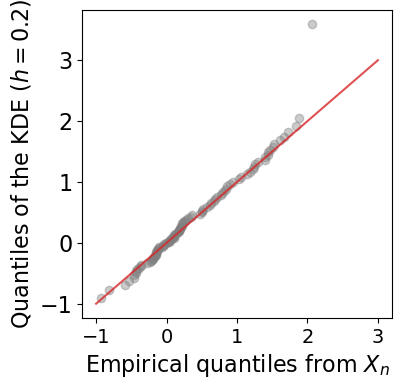

In [7]:
kernel = ot.KernelSmoothing()
kde = kernel.build(xsample, [0.2])
empirical_dist = ot.UserDefined(xsample)
empirical_levels = empirical_dist.computeCDF(xsample)
kde_quantiles = kde.computeQuantile(np.array(empirical_levels).flatten())

plt.figure(figsize=(4, 4))
plt.scatter(xsample, kde_quantiles, marker='o', color="C7", alpha=0.4)
plt.plot([-1, 3], [-1, 3], color="C3", alpha=0.8)
plt.xlabel("Empirical quantiles from $X_n$")
plt.ylabel("Quantiles of the KDE ($h=0.2$)")
plt.savefig("figures/qqplot.png", dpi=300, bbox_inches='tight', transparent=True);